#### 4 Redes neuronales convolucionales

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12728604063285019774
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3226140672
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3948177943373176965
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


cargamos datos

In [2]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
#cargamos datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


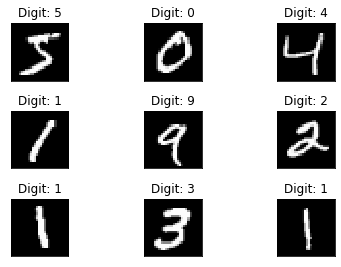

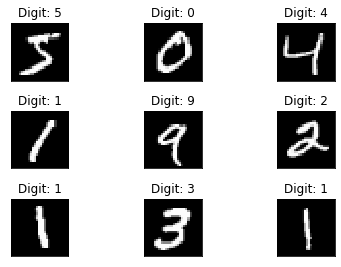

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Preparamos los datos

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(img_train, lab_train), (img_test, lab_test) = mnist.load_data()

print (img_train.shape)
img_train = img_train.reshape((60000, 28, 28, 1))
img_train = img_train.astype('float32') / 255

img_test = img_test.reshape((10000, 28, 28, 1))
img_test = img_test.astype('float32') / 255

lab_train = to_categorical(lab_train)
lab_test = to_categorical(lab_test)

(60000, 28, 28)


preparamos un modelo de CNN

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import optimizers



model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='selu',
                 input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='selu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='selu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128, activation='selu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

#Adaptive learning rate (adaDelta) funciona muy bien en CNN rivalizando con adam y adagrad
#la función de pérdida para clasificación categorical crossentropy
model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

ahora a entrenar ufff

In [6]:
batch_size = 40
num_epoch = 10

model_log = model.fit(img_train, lab_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(img_test, lab_test))

Epoch 1/10
1500/1500 [==============================] - 9s 4ms/step - loss: 2.2346 - accuracy: 0.1779 - val_loss: 1.7593 - val_accuracy: 0.6316
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.7238 - accuracy: 0.5227 - val_loss: 1.3276 - val_accuracy: 0.7513
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3345 - accuracy: 0.6706 - val_loss: 1.0161 - val_accuracy: 0.8069
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.0557 - accuracy: 0.7449 - val_loss: 0.8113 - val_accuracy: 0.8348
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8744 - accuracy: 0.7845 - val_loss: 0.6762 - val_accuracy: 0.8517
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7434 - accuracy: 0.8096 - val_loss: 0.5849 - val_accuracy: 0.8668
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6642 - accuracy: 0.8258 - val_loss: 0.5209 - val_accuracy:

veamos metricas

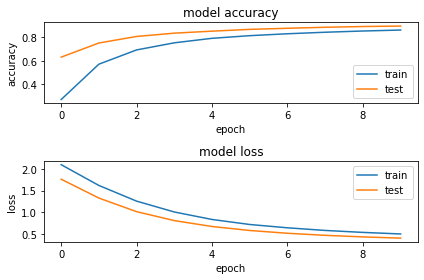

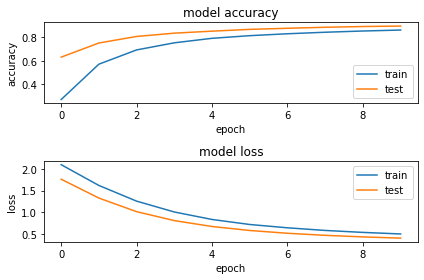

In [7]:


import os
# plotting the metrics

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

guardamos el modelo

In [8]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
